# Monte Carlo Simulation
This experiment is inspired by MarbleScience's video on the [Monte Carlo Simulation](https://www.youtube.com/watch?v=7ESK5SaP-bc). For a more detailed explanation on the method, you may check the linked video.

In [209]:
from random import seed, uniform
from math import sqrt, pi
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In this notebook, we try to simulate the video's first example where $\pi$ was estimated through Monte Carlo sampling. For the experiment, we simulate a rectangular table with a square container of side length $a$ and a circular container of radius $a$. 

Experimental setup (in units):
|             $a = 0.08$             |  $table_{size} = 0.30 \times 0.20$ |
|:----------------------------------:|:----------------------------------:|
| $square_{x0, y0} = \{0.02, 0.05\}$ | $circle_{center} = \{0.20, 0.10\}$ |

In [222]:
class MarbleTable:
    def __init__(self, n_marbles=100, plot_estimate=False):
        # Number of marbles to be dropped
        self.n_marbles = n_marbles
        # Set coordinates for table
        self.a = 0.08 # 0.08 0.09
        self.table_x = 0.30
        self.table_y = 0.20
        # Set coordinates for square
        self.square_x0 = 0.02 # 0.01 0.02
        self.square_x1 = self.square_x0 + self.a
        self.square_y0 = 0.05
        self.square_y1 = self.square_y0 + self.a
        # Set coordinates for circle
        self.circle_cx = 0.20
        self.circle_cy = 0.10
        # Set initial number of marbles inside
        self.square_marbles = 0
        self.circle_marbles = 0
        # S
        self.plot_estimate = plot_estimate
        if self.plot_estimate:
            self.estimate_x = []
            self.estimate_y = []

    def _in_square(self, x, y):
        '''
        Checks if marble is inside square.
        '''
        if x > self.square_x0 and x < self.square_x1:
            return True if y > self.square_y0 and y < self.square_y1 else False
        else:
            return False
        
    def _in_circle(self, x, y):
        '''
        Checks if marble is inside circle.
        '''
        d = sqrt((self.circle_cx-x)**2 + (self.circle_cy-y)**2)
        return True if d < self.a else False

    def simulate(self):
        '''
        Performs the Monte Carlo simulation
        '''
        fig, ax = plt.subplots(1)
        ax.set_xlim(0, self.table_x)
        ax.set_ylim(0, self.table_y)
        ax.add_patch(patches.Rectangle((self.square_x0, self.square_y0), self.a, self.a, color='red'))
        ax.add_patch(patches.Circle((self.circle_cx, self.circle_cy), self.a, color='green'))
        seed(1) # Random seed is set so that we can simulate continuous dropping of marbles (the positioning of dropped marbles do not reset)
        for n in range(self.n_marbles):
            x = uniform(0, self.table_x)
            y = uniform(0, self.table_y)
            plt.scatter(x, y, color='black')
            if self._in_square(x, y):
                self.square_marbles += 1
            elif self._in_circle(x, y):
                self.circle_marbles += 1
            else:
                pass
            if self.plot_estimate and self.square_marbles:
                self.pi_estimate = self.circle_marbles/self.square_marbles
                self.estimate_x.append(n)
                self.estimate_y.append(self.pi_estimate)
        plt.show()
        if not self.plot_estimate:
            self.pi_estimate = self.circle_marbles/self.square_marbles
        return self.pi_estimate
    
    def print_results(self):
        print(f'Number of marbles in circle: {self.circle_marbles}')
        print(f'Number of marbles in square: {self.square_marbles}')
        print(f'Ratio of marbles in circle to marbles in square: {self.pi_estimate}')       
    
    def plot_pi_estimates(self):
        '''
        Plots the Pi estimate over the number of marbles
        '''
        fig_pi = plt.figure(figsize=(10,5))
        plt.axhline(y=pi, color='red')
        plt.plot(self.estimate_x, self.estimate_y, '-o')
        plt.title("Monte Carlo Pi Estimates")
        plt.xlabel("Number of marbles dropped")
        plt.ylabel("Pi estimate")
        plt.show()

Looking at the first simulation with the default 100 marbles, it is observed that 35 marbles fell into the circular container and 14 fell into the square container, leading to a $\pi$ estimate of $2.5$.

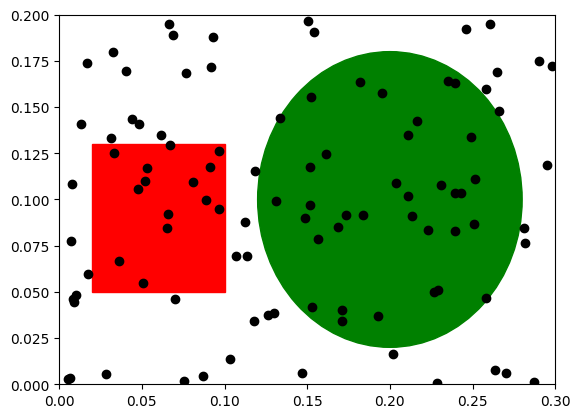

Number of marbles in circle: 35
Number of marbles in square: 14
Ratio of marbles in circle to marbles in square: 2.5


In [223]:
monte_carlo = MarbleTable()
monte_carlo.simulate()
monte_carlo.print_results()

If we dropped 500 marbles, we get a $\pi$ estimate of around $2.83$, which is closer to its actual value.

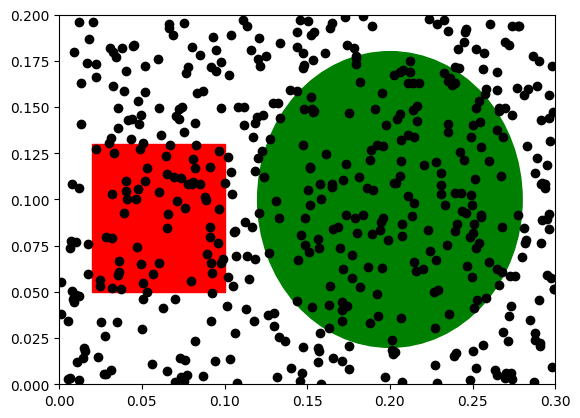

Number of marbles in circle: 164
Number of marbles in square: 58
Ratio of marbles in circle to marbles in square: 2.8275862068965516


In [224]:
monte_carlo = MarbleTable(n_marbles=500)
monte_carlo.simulate()
monte_carlo.print_results()

The estimate becomes even closer to $\pi$, as dropping 1500 marbles now results to an estimate of around $2.92$.

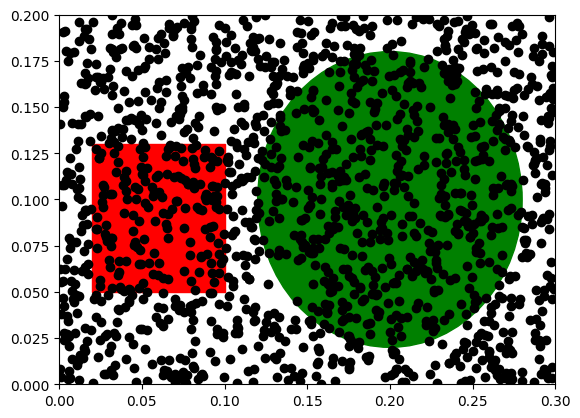

Number of marbles in circle: 488
Number of marbles in square: 167
Ratio of marbles in circle to marbles in square: 2.9221556886227544


In [225]:
monte_carlo = MarbleTable(n_marbles=1500)
monte_carlo.simulate()
monte_carlo.print_results()

Finally, we get even more closer to the actual value of $\pi$ as we dropped 2500 marbles, closing in to an estimate of around $3.15$.

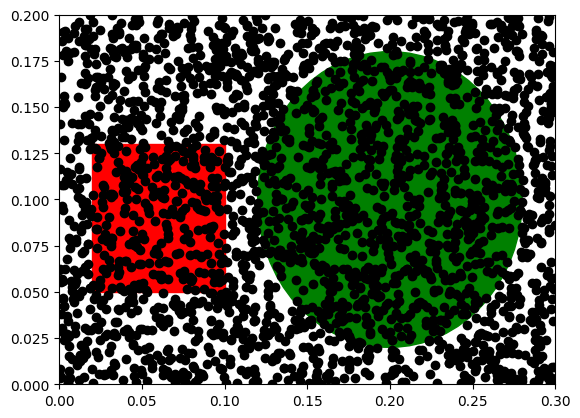

Number of marbles in circle: 829
Number of marbles in square: 263
Ratio of marbles in circle to marbles in square: 3.1520912547528517


In [226]:
monte_carlo = MarbleTable(n_marbles=2500, plot_estimate=True)
monte_carlo.simulate()
monte_carlo.print_results()

If we look at the plot of the $\pi$ estimate over the number of marbles dropped, we see that this value fluctuates with less marbles dropped. However, we see that the $\pi$ estimate converges to its expected value (as indicated by the red line) as we increase the number of marbles dropped. This is proven by the Law of Large Numbers (LLN), which essentially states that as your sample size gets larger, the average tends to be closer to the actual value (in this case, $\pi$).

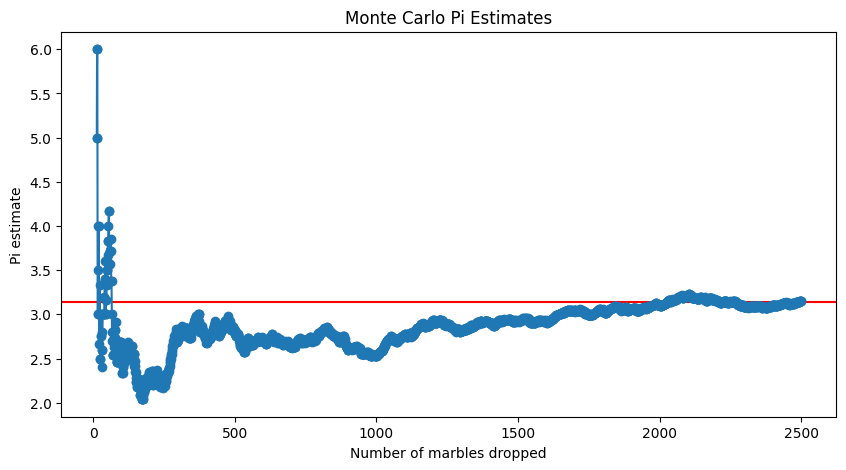

In [227]:
monte_carlo.plot_pi_estimates()